<a href="https://colab.research.google.com/github/EldritchBear/ADA-Informes/blob/main/MaxSubArray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Descripción del problema 

El problema del subarreglo máximo consiste en recibir un arreglo de tamaño $n$ lleno de datos y buscar la mayor suma posible entre los datos contiguos dentro de este arreglo, una vez encontrada la suma, esta es devuelta al usuario. Este algoritmo es utilizado para conseguir estimados del mejor caso cuando se quiere analizar patrones entre otras cosas. Las aplicaciones que puede llegar a tener este algoritmo son los analisis de compra y venta de acciones para ver la rentabilidad o analizar los pixeles y su brillo en imagenes.

Ejemplo de entrada y salida:

image.png


#2. Descripción del algoritmo

El algoritmo recibe un arreglo y se comienza a buscar un subarreglo que contenga la mayor suma de los datos, una vez que se encuentre este subarreglo se puede retornar tanto la suma como el subarreglo. La busqueda de estos subarreglos son variadas, se puede recorrer el arreglo hasta encontrarse con un dato negativo y reiniciar la cuenta como tambien se puede dividir el arreglo como mitad izquierda y mitad derecha y comenzar a analizar desde ese punto. No hay solo una forma única de implementar este problema y es por esto que existen soluciones que van desde $O(n^2)$ hasta $O(n)$.

In [ ]:
def maxSubArrayMid(arreglo, low, mid, high):
    suma = 0
    sumaL = 0
    sumaR = 0
    sumaH = 0
    max1 = 0
    max2 = 0

    if(verbose):
      print("subarreglo izquierdo: ",arreglo[low:mid])
      print("subarreglo derecho: ",arreglo[mid:high])
      print("\n")
    
    for i in range(mid, low-1, -1):
      suma += arreglo[i]
      if (suma > sumaL):
        sumaL = suma
        max1 = i
 
    suma = 0
    for i in range(mid, high + 1):
      suma += arreglo[i]
      if (suma > sumaR):
        sumaR = suma
        max2 = i

    suma = 0
    for i in range(max1, mid):
      suma += arreglo[i]
      if (suma > sumaH):
        sumaH = suma

    suma = 0

#    sumaH = sumaL + sumaR
#    if (arreglo[mid] < 0):
#      sumaH += arreglo[mid]
#    else:
#      sumaH -= arreglo[mid]

#     La sumaL no se por que guarda valores que no deberia, eso despues me causa problemas en el analisis.

    if (verbose):
      print("Suma izquierda: ",sumaL)
      print("Suma medio: ",sumaH)
      print("Suma derecha: ",sumaR)
      print("\n")

    if (sumaL > sumaR and sumaL > sumaH):
      return sumaL,low,max1
    if (sumaR > sumaL and sumaR > sumaH):
      return sumaR,mid,max2
    else:
      return sumaH,max1,max2

In [ ]:
def maxSubArray(arreglo, low, high, verbose):
    if (low > high):return -10000
    if (low == high):return arreglo[low]

    mid = (low + high) // 2

    maxSubArray(arreglo, low, mid-1,verbose)
    maxSubArray(arreglo, mid+1, high,verbose)
    suma,i,j =  maxSubArrayMid(arreglo, low, mid, high)
 
    return suma,i,j

In [ ]:
arreglo = [3,5,-17,3,6,-1,9,3,-2,-4]
verbose = False
n = len(arreglo)
 
suma,i,j = maxSubArray(arreglo, 0, n-1, verbose)
print("Arreglo: ",arreglo)
print("Suma total: ", suma)
print("índices: ",i,",",j)
print("Subarreglo: ",arreglo[i:j+1])

Arreglo:  [3, 5, -17, 3, 6, -1, 9, 3, -2, -4]
Suma total:  17
índices:  4 , 7
Subarreglo:  [6, -1, 9, 3]


In [ ]:
arreglo = [3,5,-17,3,6,-1,9,3,-2,-4]
verbose = True
n = len(arreglo)
 
suma,i,j = maxSubArray(arreglo, 0, n-1, verbose = False)
print("Arreglo: ",arreglo)
print("Suma total: ", suma)
print("índices: ",i,",",j)
print("Subarreglo: ",arreglo[i:j+1])

subarreglo izquierdo:  []
subarreglo derecho:  [-17]


Suma izquierda:  0
Suma medio:  8
Suma derecha:  0


subarreglo izquierdo:  [3]
subarreglo derecho:  [5, -17]


Suma izquierda:  8
Suma medio:  3
Suma derecha:  5


subarreglo izquierdo:  []
subarreglo derecho:  [-1]


Suma izquierda:  0
Suma medio:  8
Suma derecha:  8


subarreglo izquierdo:  []
subarreglo derecho:  [-2]


Suma izquierda:  0
Suma medio:  11
Suma derecha:  0


subarreglo izquierdo:  [-1, 9]
subarreglo derecho:  [3, -2]


Suma izquierda:  12
Suma medio:  9
Suma derecha:  3


subarreglo izquierdo:  [3, 5, -17, 3]
subarreglo derecho:  [6, -1, 9, 3, -2]


Suma izquierda:  9
Suma medio:  3
Suma derecha:  17


Arreglo:  [3, 5, -17, 3, 6, -1, 9, 3, -2, -4]
Suma total:  17
índices:  4 , 7
Subarreglo:  [6, -1, 9, 3]


#3. Tiempo de Ejecucción

El problema del subarreglo máximo puede ser implementado de distintas maneras, cada manera con un tiempo de ejecución distinto a los anteriores pero ninguno de estos depende del como esten los datos, quiero decir que no existe diferencia alguna entre un supuesto $mejor$ o $peor$ caso, ambos presentan el mismo tiempo de ejecucción. Esto es debido a que no existen situaciones en ambos casos que produzcan que ocurran más iteraciones o menos. 
La forma en que fue implementado este algoritmo antes es llamada "divide y vencerás", esto significa que el arreglo se va a dividir recursivamente a la mitad y cuando no pueda seguír dividiendose se van a comenzar a sumar sus valores para buscar la suma mayor a medida que se van volviendo a unir los subarreglos.
Por la forma en que esto se realiza, dividir constantemente para luego recorrer todos estos datos de forma lineal, tenemos que esta forma de implementación tiene la forma de $T(n) = 2T(n/2) + O(n)$ que es equivalente a $O(nlogn)$.

# 4. Correctitud
## 4.1 Correctitud de MaxSubArrayMid
## Teorema

La función MaxSubArrayMid retorna el subarreglo máximo que pasa por el medio del arreglo de entrada.

## Prueba del teorema

En cada iteración, se realiza un paso en el recorrido del arreglo desde el medio hacia una posición más cercana al inicio o el final, según la mitad. Asumiendo que *m* es el medio del arreglo y *s* el valor máximo, probaremos la siguiente propiedad invariante:
> Al final de cada iteración, *s* es la suma máxima hasta ese punto.

## Inicialización
Al final de la primera iteración (*i = 0*), el elemento en la posición *m - 0* es la suma máxima, y como el subarreglo debe tener al menos un elemento, se cumple la propiedad.

## Mantención
Aplicando inducción, se puede asumir que al comienzo de cada iteración, *s* es la suma máxima hasta la posición anterior a *i*. Para mantener la propiedad, los elementos entre *m* y *m ± i* se suman y luego se comparan el valor de *s*. Si el valor de la nueva suma es mayor a *s*, su valor se actualiza y se seguirá cumpliendo la propiedad invariante.

## Correctitud
La propiedad invariante es verdadera al inicio del bucle y se mantiene en cada iteración. Por lo tanto, se puede decir que al finalizar el algoritmo, el resultado será un subarreglo con la suma máxima desde la posición *m* hasta *m ± n/2*.

## 4.2 Correctitud de MaxSubArray
## Teorema
El algoritmo *maxSubArray* recibe un arreglo de n elementos y retorna el subarreglo que contiene el valor máximo al sumar todos sus elementos contiguos.

## Prueba del teorema
**Caso base:** Cuando sólo hay un elemento en el arreglo, el elemento máximo es el único que contiene. Por lo tanto, retorna este elemento.

**Caso general (n>1):** Se asume que *maxSubArray* es correcto si el tamaño del arreglo es m < n.

El algoritmo divide el arreglo en 2 mitades de largo n/2 si n > 1, y luego las procesa utilizando el mismo algoritmo. Como el tamaño de los algoritmos es menor a la del arreglo original, se cumple que m < n.

#5. Experimentos

##5.1. Comparacion del algoritmo

En este experimento vamos a comparar el algorimo creado en este informe con el algoritmo kadane, este algoritmo lleva a cabo la misma tarea que el algoritmo max sub-array, pero a diferencia de este kadane no es recursivo.

In [ ]:
import random
from sys import maxsize
  
def kadane(a,size):
  
    max_so_far = -maxsize - 1
    max_ending_here = 0
    start = 0
    end = 0
    s = 0
  
    for i in range(0,size):
  
        max_ending_here += a[i]
  
        if max_so_far < max_ending_here:
            max_so_far = max_ending_here
            start = s
            end = i
  
        if max_ending_here < 0:
            max_ending_here = 0
            s = i+1
        
        return max_so_far

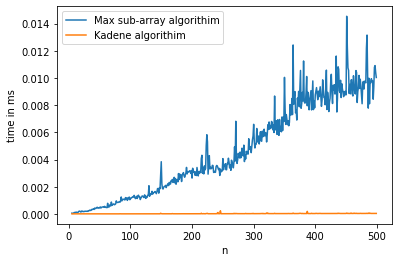

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
x1=[]; y1=[]

for n in range(5,500):

  a = random.sample(range(-1000, 1000), n)
  low = 0
  high = len(a)//2
  verbose = False


  #la función repeat está ejecutando 20 veces cada algoritmo con el arreglo a y retorna el mejor tiepo obtenido para cada uno.
  t = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({a},{low},{high-1}, {verbose})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  t = repeat(setup="from __main__ import kadane", stmt=f"kadane({a},{len(a)})", repeat=1, number=10)

  x1.append(n)
  y1.append(t)

plt.plot(x,y)
plt.plot(x1,y1)
plt.legend(["Max sub-array algorithim", "Kadene algorithim"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

###Analisis

Como se apreciar el algoritmo kadane es mas efectivo que el metodo recursivo de "divide y vencerás" esto es debido a que el algoritmo kadane es de complejidad $O(n)$ a diferencia de un $O(nlogn)$.

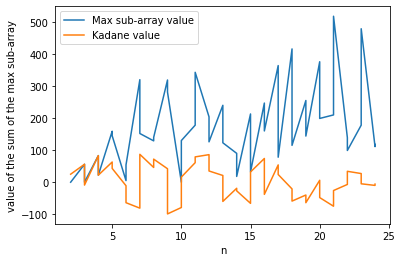

In [ ]:
import matplotlib.pyplot as plt
import random

x=[]; y=[]
x1=[]; y1=[]
x2=[]; y2=[]

for n in range(5,50):

  a = random.sample(range(-100, 100), n)
  n = len(a)//2
  verbose = False

  sum,i,j = maxSubArray(a,0,n-1,verbose)

  x.append(n)
  y.append(sum)

  sum = kadane(a,len(a))

  x1.append(n)
  y1.append(sum)

plt.plot(x,y)
plt.plot(x1,y1)
# plt.plot(x2,y2)
plt.legend(["Max sub-array value", "Kadane value"])

plt.xlabel('n')
plt.ylabel('value of the sum of the max sub-array')
plt.show()